# Section D3 - Graphing with Pandas (and Matplotlib)

Feedback: https://forms.gle/Le3RAsMEcYqEyswEA

## DataFrame.plot
The plot function built into the Pandas DataFrame object works with matplotlib to generate plots for you using a few standard arguments:

* **data** is the dataframe object to work on.  If you call df.plot, this is implied, and if you call pd.DataFrame.plot(data=df, ...) it must be given as an argument. 
* **x** is a label or position, defaulting to None.
* **y** is a label, position, or list of balel, positions, defaulting to None.
* **kind** is the type of plot to make:  line, bar, hist, scatter, etc...  

As well as a bunch of more detailed options for the plot axis, subplots, style options etc.  Read over the documintation for a few min to see what options are available: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

Let's make a few typesc of charts!  We'll start by pulling some data that we can work with. This is from the USGS gauging station at Toland Landing in Rio Vista, CA.  This data clearly shows the tide, includes a lot of parameters to play with.

Note that we're importing numpy and pyplot here, as these are needed in a couple examples below.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_url = 'https://waterservices.usgs.gov/nwis/iv/?sites=11455485&startDT=2024-09-15T20:55:29.967-07:00&endDT=2024-10-15T20:55:29.967-07:00&format=rdb'
tol_all= pd.read_csv(data_url, sep='\t', comment='#', header=0)
tol_all = tol_all.drop(tol_all.index[0])

# regression/scatter of specific conductivity and salinity
# time series with nitrate and chlorophyll; ph,do and chlorophyll...
# Boxplot of daily temperature

In [ ]:
cols = {'datetime': 'datetime',
        '288768_00065': 'gage height ft',
        '288432_00010': 'temperature C',
        '288434_00095': 'specific conductance uS/cm',
        '291459_00300': 'dissolved oxygen mg/L',
        '291463_00400': 'pH',
        '304254_32295': 'dom ug/L',
        '305297_90860': 'salinity ppt',} 
tol = tol_all[cols.keys()].rename(columns=cols)
tol['datetime'] = pd.to_datetime(tol['datetime'])
tol = tol.set_index('datetime')
tol = tol.apply(pd.to_numeric, errors='coerce')
print(tol.head())

## Time series
Since the datetime values in our df are set as the index, plot will automatically use them for the x axis.   We specify which column we want to use for the y axis, and the plot type, and we get a decent looking graph:

<Axes: xlabel='datetime'>

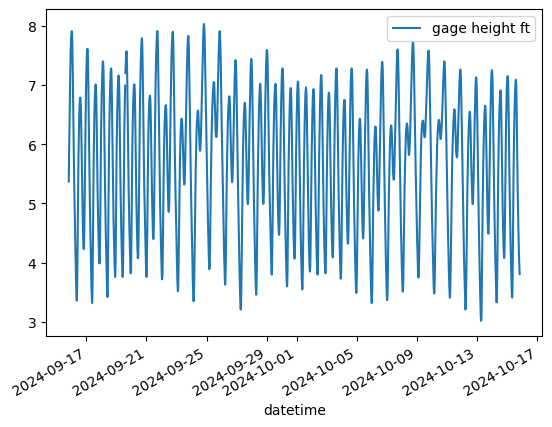

In [27]:
tol.plot(y='gage height ft', kind='line')

What a nice view showing impact of the tides on the gage height...  we can see the high-highs, low-highs, high-lows, and low-lows!

#### *Exercise*:
Set a few plot parameters to inprove the plot:
* title, xlabel, ylabel
* use figsize to make the plot wider.  Try (10,5) to start.
* change y='...' to a list y=['...', '...'] and add the specific conductance column
* sharing an axis between gauge height and specific conductance doesn't work very well, so set secondary_y='specific conductance uS/cm'.  
What migh twe say aobut the tide cycle at this station, seen via gauge height, and the conductance? 

## Scatter
Scatter plots are useful for visualizing correlation, distribution, and clustering of data.  Let's see if there's a relatinship between salinity and conductance in our data:

<Axes: xlabel='salinity ppt', ylabel='specific conductance uS/cm'>

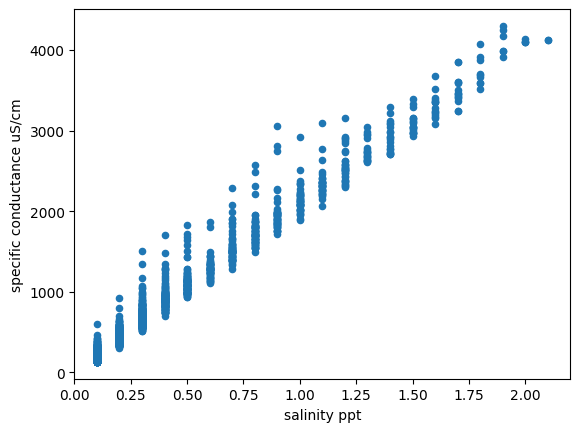

In [52]:
tol.plot(kind='scatter', y='specific conductance uS/cm', x='salinity ppt')

#### *Exercise*:
Let's make a few cosmetic changes:
* Set the color to green with `c='green'`
* set the point size and transparency with `s=50, alpha=0.7`
* set the title and axis labels if you like.

Let's see what happens if we use another column to set the color of our points.
* add `cmap='viridis'` to your plot command
* set `c=tol['temperature C']` in the plot commmand
* also try `c=tol['gage height ft']`

What observations can we make about the relationships between temperature, gage height, and salinity?

## Overlaying a Regression Line
When we run a cell and make a plot, matplotlib creates a figure that the plot is rendered on.  We can follow with a second plot in the same cell and it will be drawn on the same figure. This can be useful to add a regression line over our scatter plot.

There are some Nan values in the conductance and salinity columns in our dataframe, so we need to use dropna to clean those up before using np.polyfit.  So we create a tol_cleaned dataframe.

Then we generate our y values as `regression_line` using our x values with the slope and intercept... this is a y=mx+b equation, but since x is a series, the mutiplication and addition operations are broadcast through the series and we get a series result that we save as regression_line.  

slope: 2160.6322894868645 intercept: -19.685058556168173


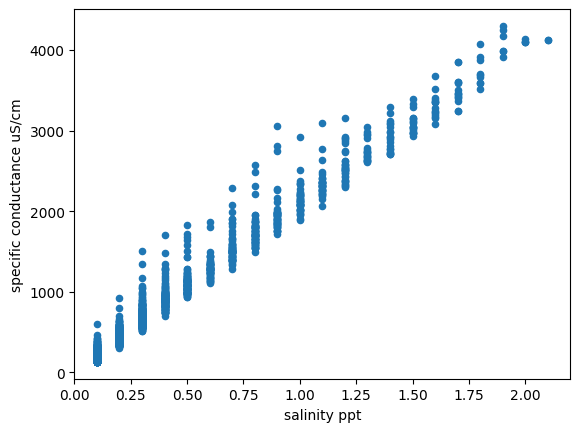

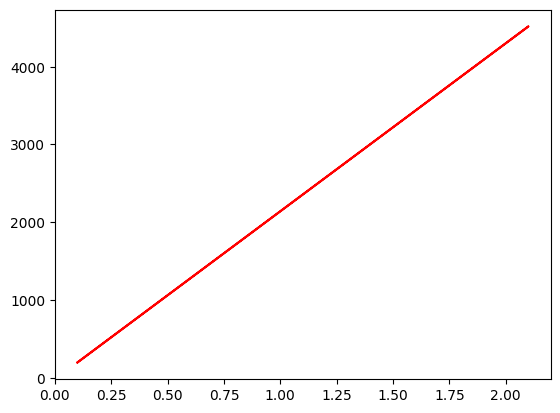

In [55]:
# Scatter plot
tol.plot(kind='scatter', y='specific conductance uS/cm', x='salinity ppt')

# Fit a regression line
tol_cleaned = tol[['specific conductance uS/cm', 'salinity ppt']].dropna()
y = tol_cleaned['specific conductance uS/cm']
x = tol_cleaned['salinity ppt']
slope, intercept = np.polyfit(x, y, 1)
print('slope:', slope, 'intercept:', intercept)

# Generate line points
regression_line = slope * x + intercept
plt.show()
# Add the regression line to the scatter plot
plt.plot(x, regression_line, color='red')

# Show plot
plt.show()

#### *Exercise*
As mentioned above, both plots share the same figure.  We can generate two separate plots by adding `plt.show()` before the second plt.plot command.  Try this.

## Box and Whiskers Plot


## Multi Axis

## Scatter Plot

## Box and Whisker Plot

## Histogram

## Heatmap

## Multiple Plots